#### **About DataSet** **:-** This dataset contains detailed information about various smartphones scraped from the Smartprix website. It includes key attributes such as model name, price, processor type, RAM capacity, storage options, camera specifications, battery life, and additional features. This dataset is ideal for predicting the price of smartphones based on various Features.

#### **Attribute Information**

* `model` : Model Name of each Phone.
* `price` : Price of each phone.
* `rating` : Rating of each phone.
* `has_5g` : Whether the phone has 5G or not.
* `has_nfc` : Whether the phone has NFC or not.
* `has_ir_blaster` : Whether the phone has IR Blaster feature or not.
* `processor_brand` : Name of processor used in each phone.
* `num_cores` : The number of cores in each phone.
* `processor_Speed` : Speed of processor of each phone in "GHz".
* `ram_capacity` : Ram of each phone in "GB".
* `internal_memory` : Internal Storage of each phone in "GB".
* `battery_capacity` : Battery power of each phone in "mAh".
* `fast_charging_available` : Whether the phone has fast charging or not.
* `fast_charging` : Fast charging of each phone in "Watt(W)".
* `screen_size` : Screen size of each phone in "inches".
* `resoulution` : Resolution of each phone in "pixels(px)".
* `refresh_rate` : Refresh Rate of each phone in "Hz".
* `num_rear_cameras` : Number of Rear cameras.
* `num_front_cameras` : Number of Front cameras.
* `os` : Operating System of each phone.
* `primary_camera_rear` : Quality of main rear camera in "MP(mega pixels)".
* `primary_camera_front` : Quality of main front camera in "MP(mega pixels)".
* `extended_memory_available` : Whether the phone has external memory space available or not.
* `extended_upto` : External capacity of memory for each phone in "GB".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
df = pd.read_csv('/content/smartphone_cleaned_my3.csv')

In [6]:
df.shape

(877, 25)

In [7]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging_available,fast_charging,screen_size,resolution,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus Nord CE 2 Lite 5G,18999,81.0,True,False,False,snapdragon,8.0,2.2,6.0,128.0,5000.0,1,33.0,6.59,1080 x 2412,120,3,1.0,android,64.0,16.0,1,1024.0
1,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,4.0,64.0,5000.0,1,15.0,6.60,1080 x 2408,90,3,1.0,android,50.0,13.0,1,1024.0
2,samsung,Samsung Galaxy F23 5G (6GB RAM + 128GB),16999,80.0,True,True,False,snapdragon,8.0,2.2,6.0,128.0,5000.0,1,25.0,6.60,1080 x 2408,120,3,1.0,android,50.0,8.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,6.0,128.0,5000.0,1,NaN,6.55,1080 x 2400,120,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,6.0,128.0,5000.0,1,67.0,6.70,1080 x 2412,120,3,1.0,android,108.0,16.0,0,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 877 non-null    object 
 1   model                      877 non-null    object 
 2   price                      877 non-null    int64  
 3   rating                     792 non-null    float64
 4   has_5g                     877 non-null    bool   
 5   has_nfc                    877 non-null    bool   
 6   has_ir_blaster             877 non-null    bool   
 7   processor_brand            848 non-null    object 
 8   num_cores                  875 non-null    float64
 9   processor_speed            862 non-null    float64
 10  ram_capacity               877 non-null    float64
 11  internal_memory            877 non-null    float64
 12  battery_capacity           865 non-null    float64
 13  fast_charging_available    877 non-null    int64  

In [9]:
# Check for missing values
df.isnull().sum()

,0
brand_name,0
model,0
price,0
rating,85
has_5g,0
has_nfc,0
has_ir_blaster,0
processor_brand,29
num_cores,2
processor_speed,15


**We can see that there are 25 columns in the dataframe and some columns like `rating`, `processor_brand`, `num_cores`, `processor_speed`, `battery_capacity`, `fast_charging`, `os`, `primary_camera_front` and `extended_upto` have null values.**

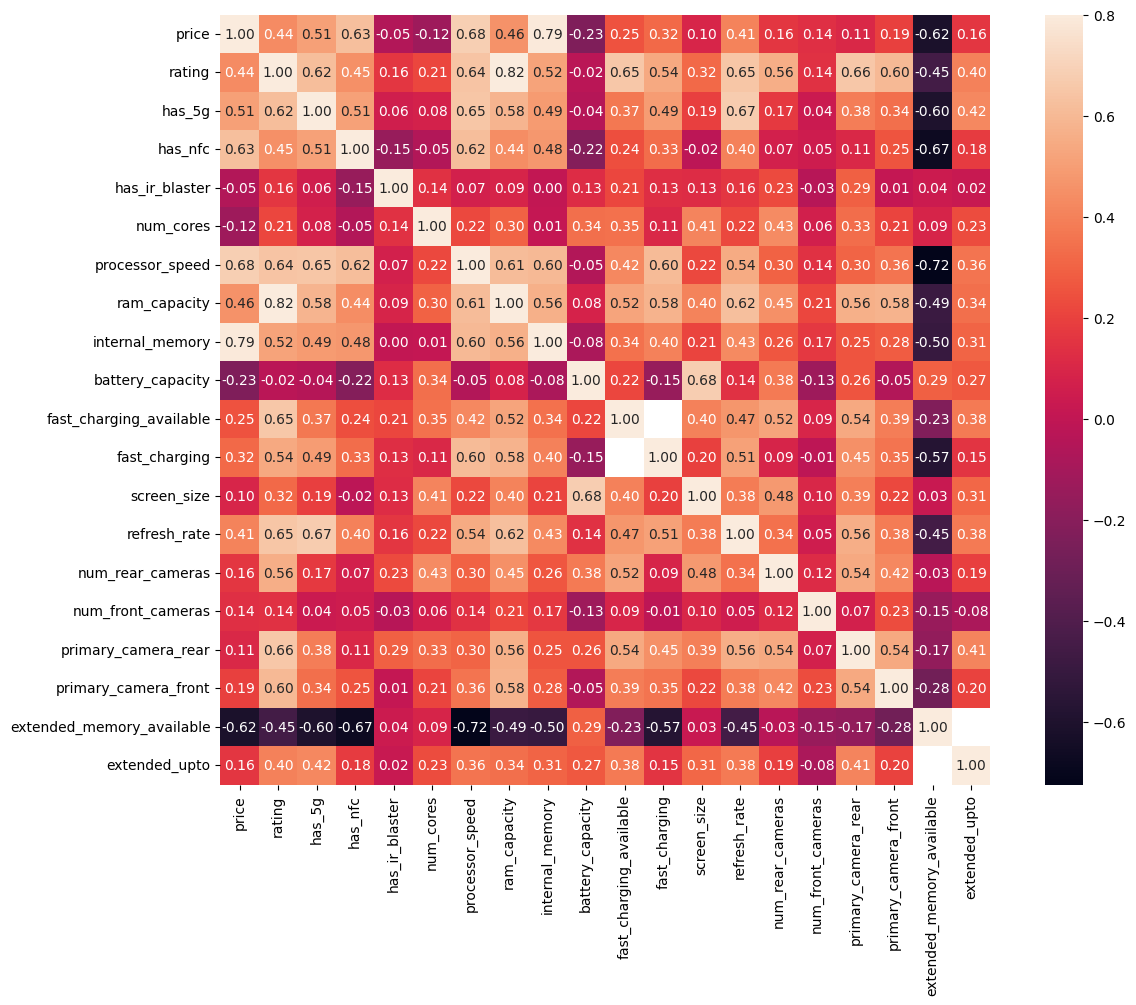

In [10]:
#correlation matrix
corrmat = df.corr(numeric_only = True)
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True)
plt.show()

In [11]:
df.corr(numeric_only = True)['price']

,price
price,1.000000
rating,0.436036
has_5g,0.507726
has_nfc,0.625872
has_ir_blaster,-0.052414
num_cores,-0.122993
processor_speed,0.683014
ram_capacity,0.455494
internal_memory,0.789996
battery_capacity,-0.234848


**We can See that `Price` of smartphone is highly correlated with `has_5g`,`has_nfc`,`processor_speed`,`internal_memory`**

In [53]:
df['brand_name'].value_counts()

,count
brand_name,
realme,138
samsung,123
xiaomi,115
vivo,89
oppo,59
apple,48
poco,40
motorola,38
tecno,36


In [54]:
df[df['brand_name'] == 'nothing']

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging_available,fast_charging,screen_size,resolution,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
12,nothing,Nothing Phone 1,26749,85.0,True,True,False,snapdragon,8.0,2.5,8.0,128.0,4500.0,1,33.0,6.55,1080 x 2400,120,2,1.0,android,50.0,16.0,0,NaN
111,nothing,Nothing Phone 1 (8GB RAM + 256GB),28249,86.0,True,True,False,snapdragon,8.0,2.5,8.0,256.0,4500.0,1,33.0,6.55,1080 x 2400,120,2,1.0,android,50.0,16.0,0,NaN
158,nothing,Nothing Phone 1 (12GB RAM + 256GB),35999,87.0,True,True,False,snapdragon,8.0,2.5,12.0,256.0,4500.0,1,33.0,6.55,1080 x 2400,120,2,1.0,android,50.0,16.0,0,NaN


In [55]:
df = df.drop([12,111,158])

###  **Top 10 brands by quantity**

In [12]:
temp = df['brand_name'].value_counts().head(10).reset_index()
temp

,brand_name,count
0,realme,138
1,samsung,123
2,xiaomi,115
3,vivo,89
4,oppo,59
5,apple,48
6,poco,40
7,motorola,38
8,tecno,36
9,infinix,31


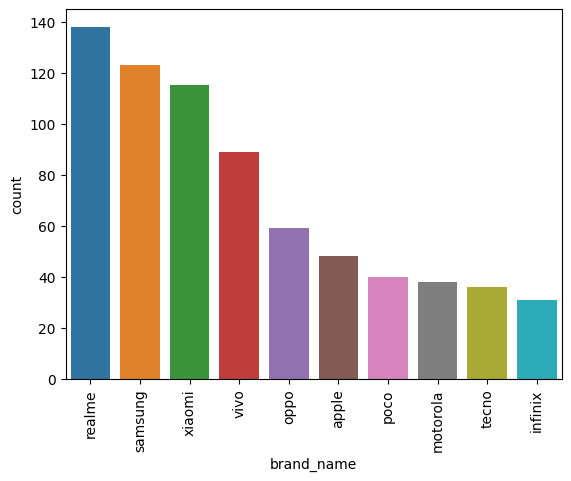

In [16]:
sns.barplot(data = temp, x = 'brand_name', y = 'count', hue = 'brand_name' )
plt.xticks(rotation = 'vertical')
plt.show()

**Distribution of brands**

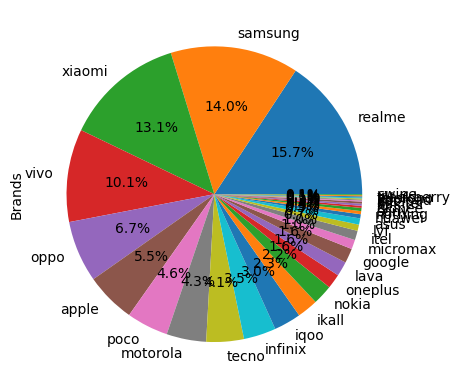

In [18]:
df['brand_name'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.ylabel('Brands')
plt.show()

**We can see that most of Phones are from Realme Company**

In [19]:
df['brand_name'].isnull().sum()

0

### **Univariate Analysis of `price`**

In [21]:
# Get the summary statistics of the "price"
df['price'].describe()

,price
count,877.000000
mean,24564.011403
std,27865.510168
min,3649.000000
25%,10499.000000
50%,15000.000000
75%,25990.000000
max,239999.000000


**Here we can see that Average price of phone is `24564` and the cheapest phone costs `3649` rupees and costliest phone is `239999`**

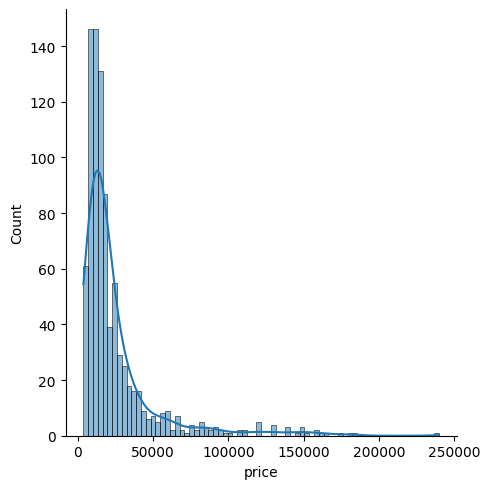

In [22]:
# Plot the distribution of prices
sns.displot(kind='hist',data=df,x='price',kde=True)

**The distribution of price is highly positively skewed**

In [23]:
df['price'].skew()

3.3285710291821817

<Axes: xlabel='price'>

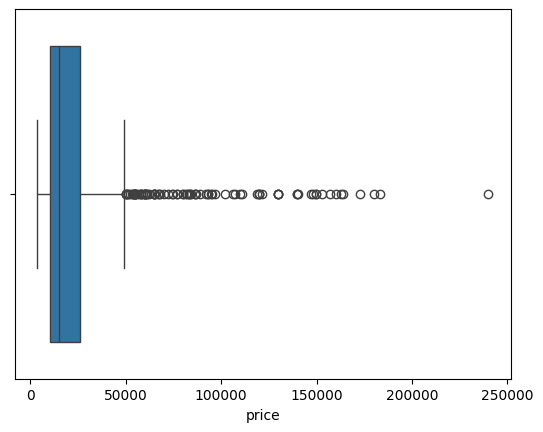

In [25]:
sns.boxplot(x = df['price'])

**From BoxPlot we can see the phones which have prices greater than 50000 can be considered as Outliers**

In [26]:
df[df['price'] > 50000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging_available,fast_charging,screen_size,resolution,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
5,apple,Apple iPhone 14,66999,81.0,True,True,False,bionic,6.0,3.22,6.0,128.0,3279.0,1,NaN,6.10,1170 x 2532,60,2,1.0,ios,12.0,12.0,0,NaN
14,apple,Apple iPhone 13,61999,79.0,True,True,False,bionic,6.0,3.22,4.0,128.0,3240.0,1,NaN,6.10,1170 x 2532,60,2,1.0,ios,12.0,12.0,0,NaN
26,apple,Apple iPhone 14 Pro Max,129990,76.0,True,True,False,bionic,6.0,NaN,6.0,128.0,4323.0,1,NaN,6.70,1290 x 2796,120,3,1.0,ios,48.0,12.0,0,NaN
29,samsung,Samsung Galaxy S22 Ultra 5G,92850,NaN,True,True,False,snapdragon,8.0,3.00,12.0,256.0,5000.0,1,45.0,6.80,1440 x 3080,120,4,1.0,android,108.0,40.0,0,NaN
43,apple,Apple iPhone 14 Plus,76999,82.0,True,True,False,bionic,6.0,3.22,6.0,128.0,4325.0,1,NaN,6.70,1284 x 2778,60,2,1.0,ios,12.0,12.0,0,NaN
52,oneplus,OnePlus 10 Pro 5G,60999,89.0,True,True,False,snapdragon,8.0,3.00,8.0,128.0,5000.0,1,80.0,6.70,1440 x 3216,120,3,1.0,android,50.0,32.0,0,NaN
55,apple,Apple iPhone 13 Pro,119900,83.0,True,True,False,bionic,6.0,3.22,6.0,128.0,3095.0,1,NaN,6.10,1170 x 2532,120,3,1.0,ios,12.0,12.0,0,NaN
68,iqoo,iQOO 11 5G,59999,88.0,True,True,False,snapdragon,8.0,3.20,8.0,256.0,5000.0,1,120.0,6.78,1440 x 3200,144,3,1.0,android,50.0,16.0,0,NaN
82,apple,Apple iPhone 14 Pro,119990,75.0,True,True,False,bionic,6.0,NaN,6.0,128.0,3200.0,1,NaN,6.10,1179 x 2556,120,3,1.0,ios,48.0,12.0,0,NaN
85,apple,Apple iPhone 12,53900,74.0,True,True,False,bionic,6.0,3.10,4.0,64.0,NaN,0,NaN,6.10,1170 x 2532,60,2,1.0,ios,12.0,12.0,0,NaN


In [27]:
df['price'].isnull().sum()

0

### **Univariate Analysis of `rating`**

In [28]:
# Get the summary statistics of the "Rating"
df['rating'].describe()

,rating
count,792.000000
mean,75.834596
std,8.087647
min,60.000000
25%,69.000000
50%,77.000000
75%,82.000000
max,89.000000


**The minimum rating of phones is `60` and maximum rating is `89` with average rating `75.83`**

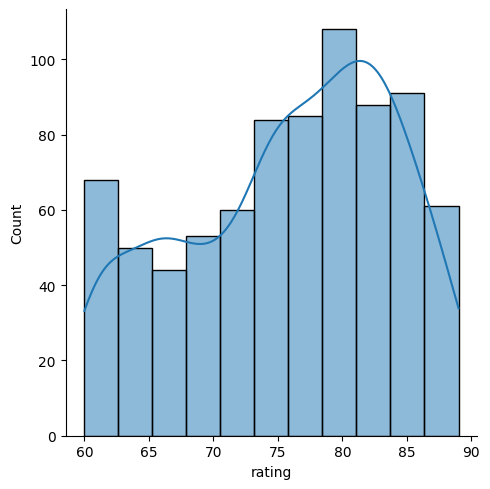

In [29]:
# Plot the distribution of ratings
sns.displot(kind='hist',data=df,x='rating',kde=True)

**The Distribution of `rating` is look like Normal Distribution**

In [30]:
df['rating'].skew()

-0.3544904278070238

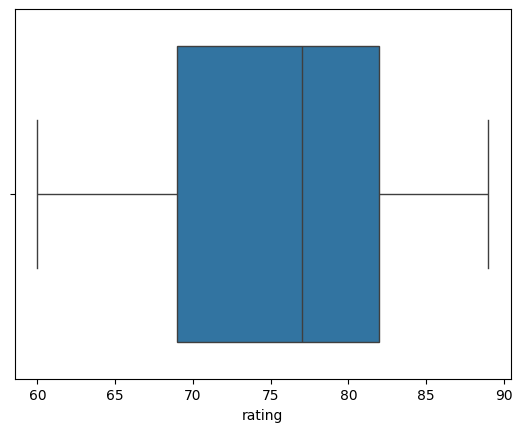

In [31]:
sns.boxplot(x = df['rating'])
plt.show()

**Null values in `rating`**

In [32]:
(df['rating'].isnull().sum()/df.shape[0])*100

9.692132269099202

**about `9.69 %` values are null in rating column**

### **Distribution of Features like `5G`,`NFC` and `IR Blaster`**

Text(0, 0.5, '5G')

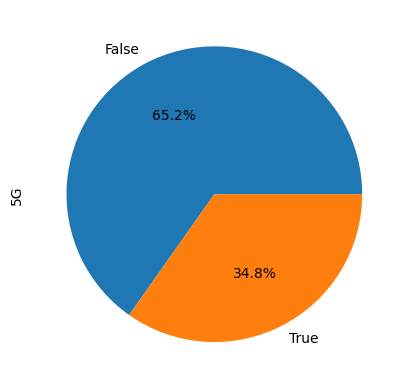

In [33]:
# has_5g
df['has_5g'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.ylabel('5G')

**About 34.8% of Phones have `5G`**

Text(0, 0.5, 'NFC')

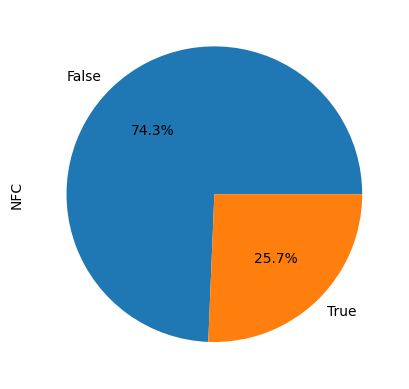

In [34]:
# has_nfc
df['has_nfc'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.ylabel('NFC')

**About 25.7% phones have `NFC`**

Text(0, 0.5, 'IR Blaster')

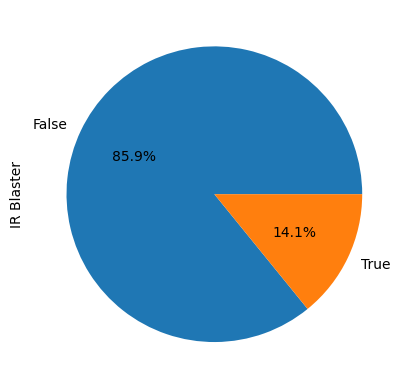

In [35]:
# has_ir_blaster
df['has_ir_blaster'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.ylabel('IR Blaster')

**About 14.1% phones have `IR Blaster`**

### **Top 5 processor_brand by quantity**

In [37]:
temp = df['processor_brand'].value_counts().head(5).reset_index()
temp

,processor_brand,count
0,snapdragon,322
1,helio,254
2,dimensity,107
3,exynos,48
4,bionic,47


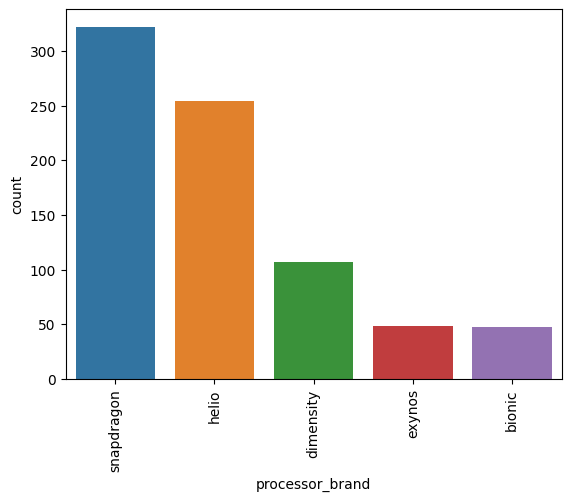

In [38]:
sns.barplot(data = temp, x = 'processor_brand', y = 'count', hue = 'processor_brand' )
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: ylabel='count'>

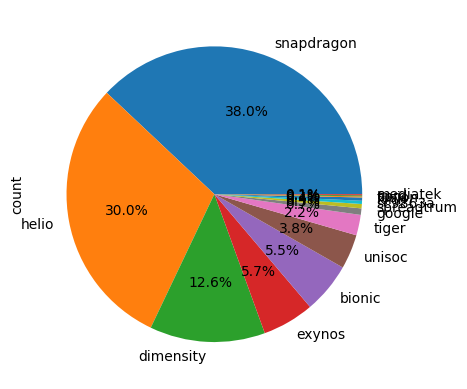

In [39]:
df['processor_brand'].value_counts().plot(kind='pie',autopct="%0.1f%%")

**We can say that Most of the phones have "snapdragon" Processor**

**Distribution of cores**

Text(0, 0.5, 'Number of Cores')

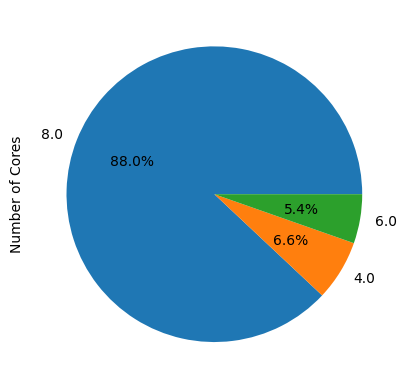

In [41]:
df['num_cores'].value_counts().plot(kind='pie',autopct="%0.1f%%")
plt.ylabel('Number of Cores')

**Most Phones have octa core**

**Distribution of Ram and Internal Memory**

<Axes: ylabel='count'>

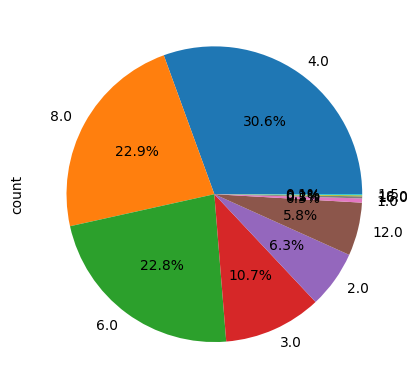

In [42]:
df['ram_capacity'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: ylabel='count'>

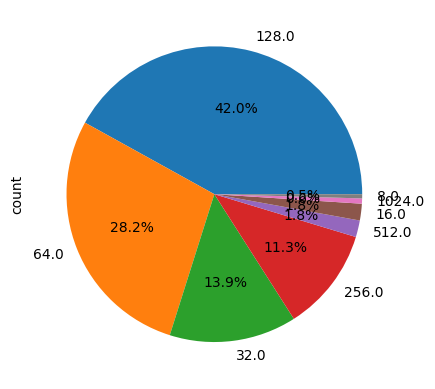

In [43]:
df['internal_memory'].value_counts().plot(kind='pie',autopct="%0.1f%%")

**Most Phones have "4 GB Ram" and have "128 GB internal memory"**

**Distribution of total number of cameras**

<Axes: ylabel='count'>

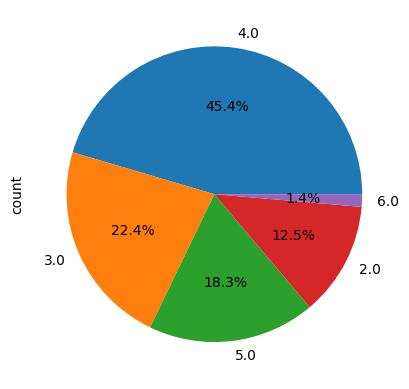

In [44]:
(df['num_rear_cameras'] + df['num_front_cameras']).value_counts().plot(kind='pie',autopct="%0.1f%%")

**Most Phones have total 4 cameras**

**Distribution of operating system**

<Axes: ylabel='count'>

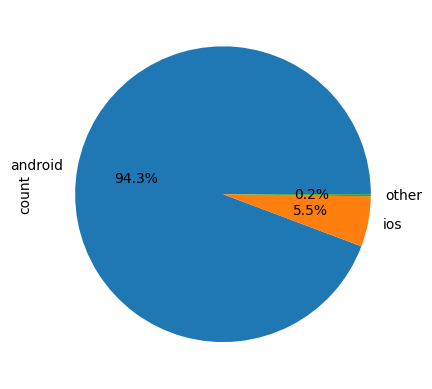

In [45]:
df['os'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### **Bivariate Analysis**

### **Plot the top 10 brands by `price`**

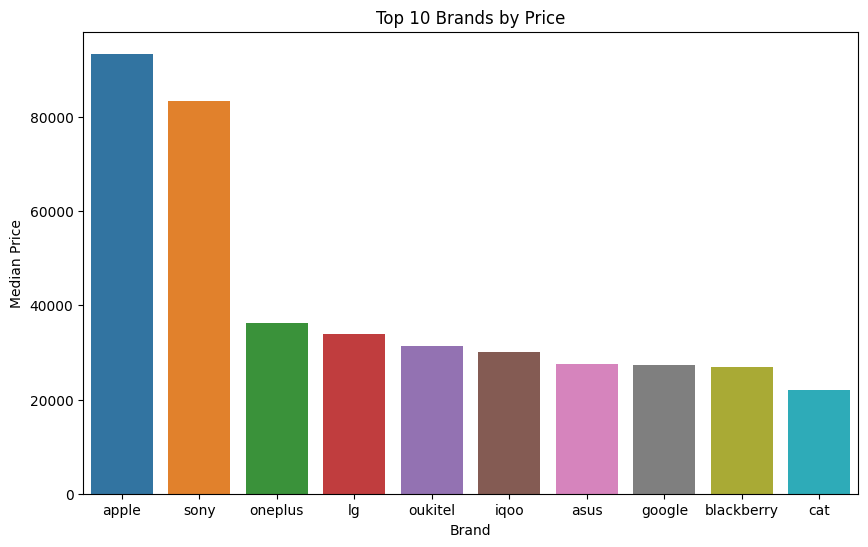

In [61]:
top_10 = df.groupby('brand_name')['price'].median().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data = top_10, x='brand_name', y= 'price', hue= 'brand_name')
plt.title('Top 10 Brands by Price')
plt.xlabel('Brand')
plt.ylabel('Median Price')
plt.show()

**We can see that `Apple`,`Sony`,`oneplus` phones are most expensive**

### **Plot the top 10 brands by `rating`**

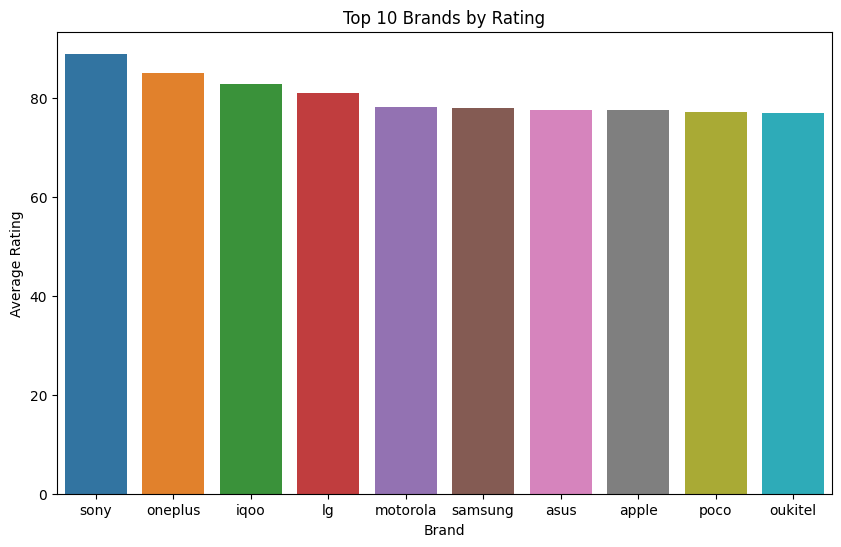

In [56]:
top = df.groupby('brand_name')['rating'].mean().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data = top, x = 'brand_name', y = 'rating', hue = 'brand_name')
plt.title('Top 10 Brands by Rating')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.show()

### **Plot the top 10 brands by `Processor speed`**

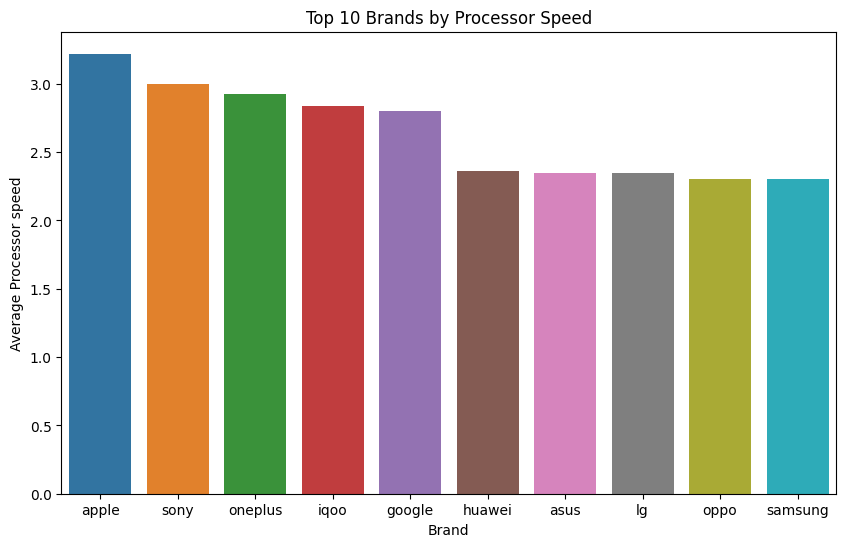

In [58]:
top = df.groupby('brand_name')['processor_speed'].median().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data = top, x = 'brand_name', y = 'processor_speed', hue = 'brand_name')
plt.title('Top 10 Brands by Processor Speed')
plt.xlabel('Brand')
plt.ylabel('Average Processor speed')
plt.show()

### **Plot the top 10 brands by `Internal Memory`**

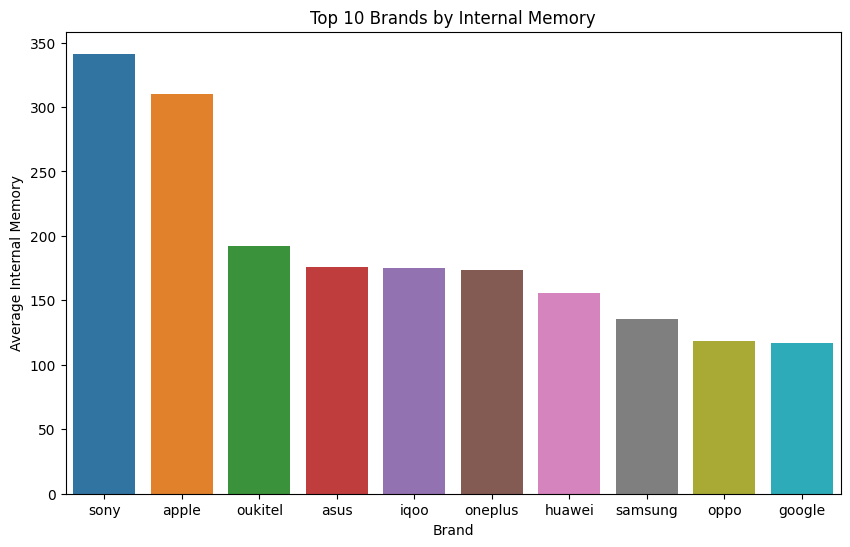

In [59]:
top = df.groupby('brand_name')['internal_memory'].mean().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data = top, x = 'brand_name', y = 'internal_memory', hue = 'brand_name')
plt.title('Top 10 Brands by Internal Memory')
plt.xlabel('Brand')
plt.ylabel('Average Internal Memory')
plt.show()

### **Plot the top 10 brands by `Refresh Rate`**

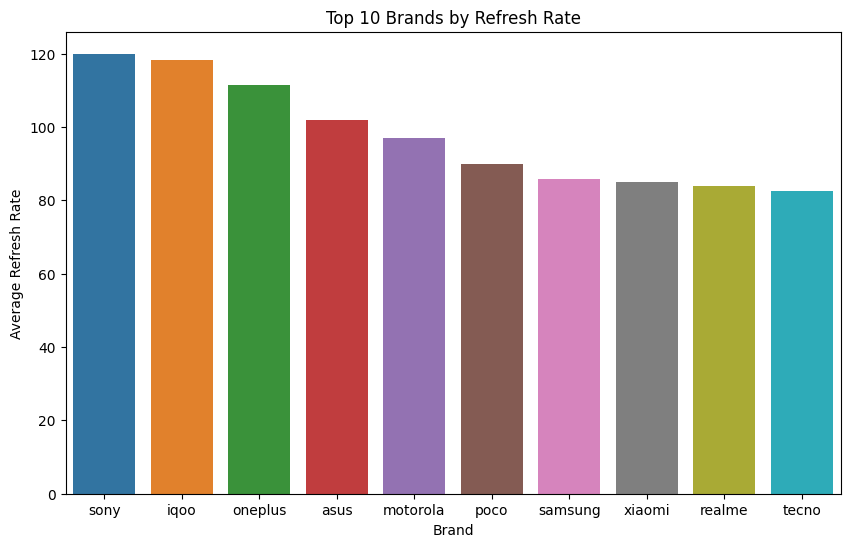

In [60]:
top = df.groupby('brand_name')['refresh_rate'].mean().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data = top, x = 'brand_name', y = 'refresh_rate', hue = 'brand_name')
plt.title('Top 10 Brands by Refresh Rate')
plt.xlabel('Brand')
plt.ylabel('Average Refresh Rate')
plt.show()

### **`Price` VS `Rating`**

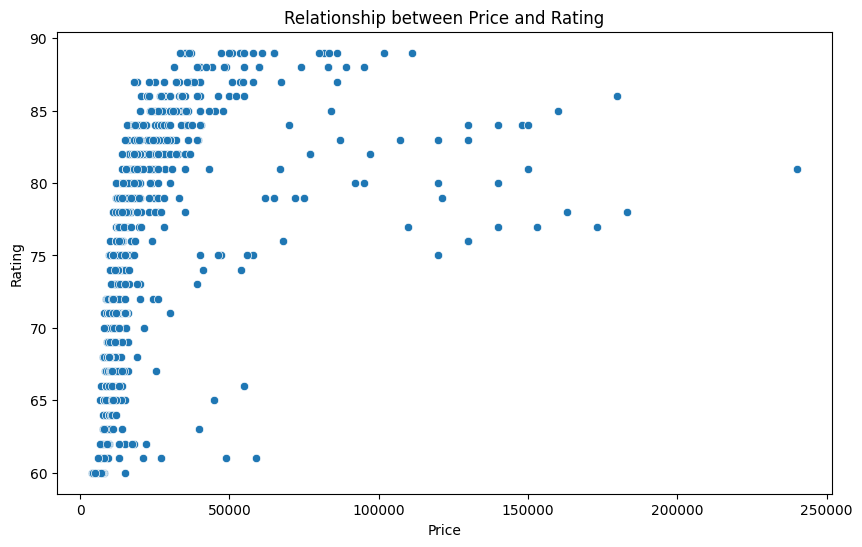

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['price'], y=df['rating'])
plt.title('Relationship between Price and Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

### **`Price` Vs `5G`, `NFC` , `IR Blaster`**

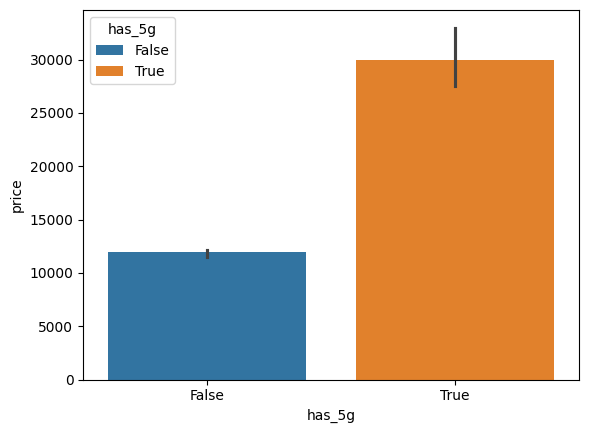

In [62]:
sns.barplot(data=df,x='has_5g',y='price',hue = 'has_5g', estimator=np.median)
plt.show()

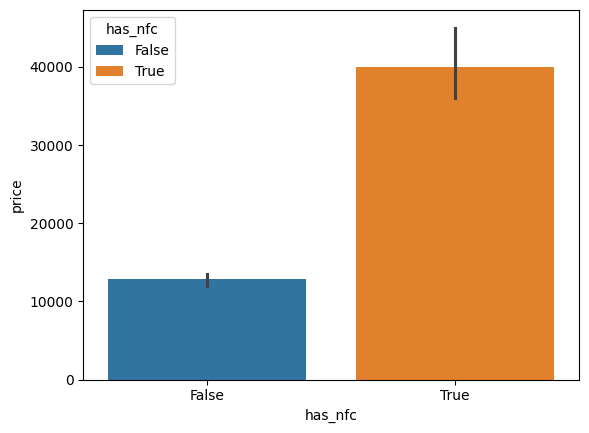

In [63]:
sns.barplot(data=df,x='has_nfc',y='price',hue = 'has_nfc' , estimator=np.median)
plt.show()

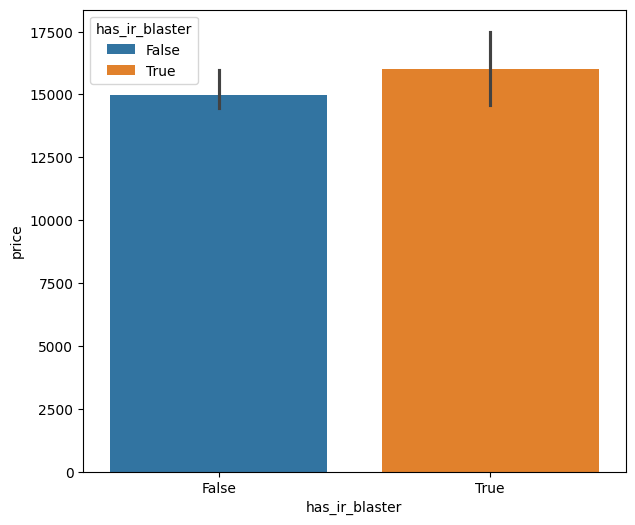

In [65]:
plt.figure(figsize=(7,6))
sns.barplot(data=df,x='has_ir_blaster',y='price', hue = 'has_ir_blaster',estimator=np.median)
plt.show()

**We can see that Prices of Phones are higher if they have `5G`,`NFC` and prices doesn't depend on `IR Blaster`**

### **`Price` Vs `Processor Speed`**

<Axes: xlabel='processor_speed', ylabel='price'>

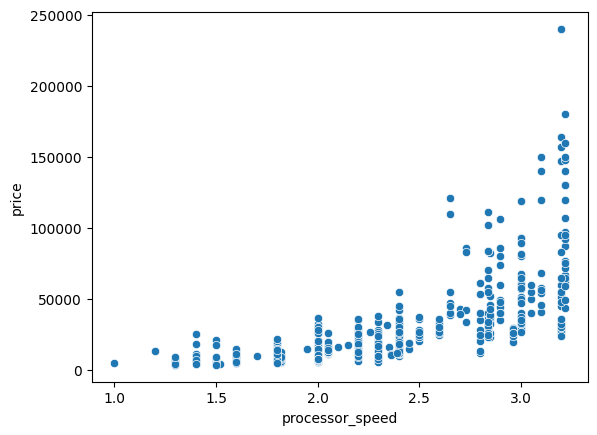

In [66]:
sns.scatterplot(data=df,x='processor_speed',y='price')

**Higher the processor speed higher the prices**

### **`Price` Vs `Internal Memory`**

<Axes: xlabel='internal_memory', ylabel='price'>

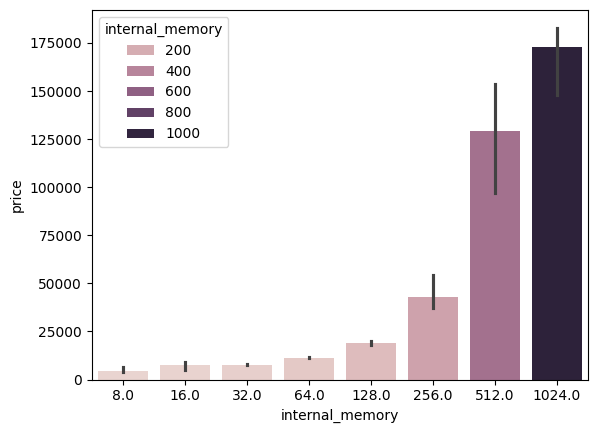

In [67]:
sns.barplot(data=df,x='internal_memory',y='price',hue = 'internal_memory' , estimator=np.median)

### **`Price` Vs `Refresh Rate`**

<Axes: xlabel='refresh_rate', ylabel='price'>

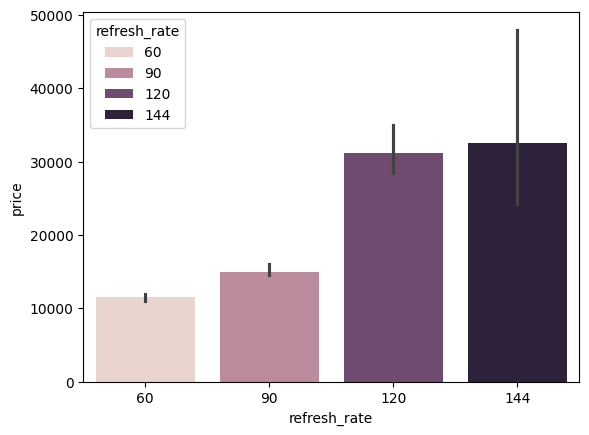

In [68]:
sns.barplot(data=df,x='refresh_rate',y='price',hue = 'refresh_rate' , estimator=np.median)

##  **`Price` Vs `Number of cores`**

([0, 1, 2], [Text(0, 0, '4.0'), Text(1, 0, '6.0'), Text(2, 0, '8.0')])

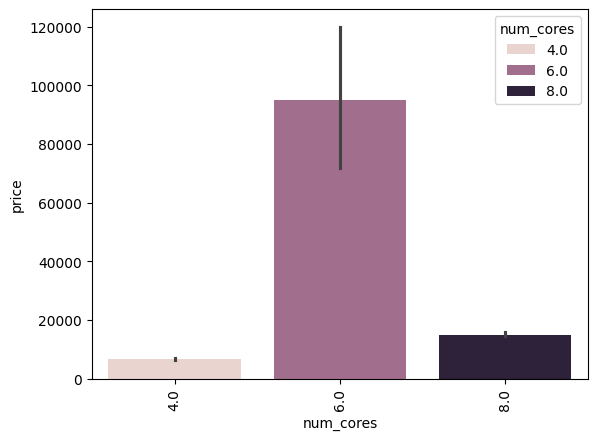

In [69]:
sns.barplot(data=df,x='num_cores',y='price', hue = 'num_cores',estimator=np.median)
plt.xticks(rotation='vertical')

**Phones which have `hexa core` have higher prices than others**

##  **`Price` Vs `Operating System`**

([0, 1, 2], [Text(0, 0, 'android'), Text(1, 0, 'ios'), Text(2, 0, 'other')])

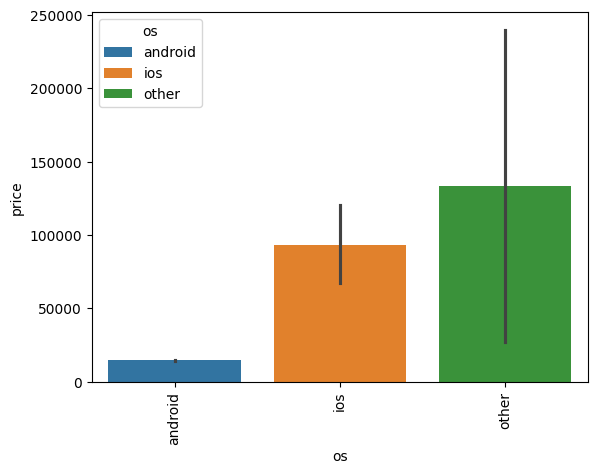

In [71]:
sns.barplot(data=df,x='os',y='price', hue = 'os',estimator=np.median)
plt.xticks(rotation='vertical')

**Android Phones are cheapest**